
- #### Predict the store of the next visit in the context of each card



## Data exploration, manipulation and feature engineering

In [5]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [6]:
#loading the data
xcell = pd.ExcelFile('Cards.xlsx')

sheet_names=xcell.sheet_names
sheet_names

['1000000',
 '82148',
 '205045',
 '454604',
 '495519',
 '501981',
 '626571',
 '864963',
 '1057633',
 '1125507']

In [7]:
df_list=[]
for sheet in sheet_names:
    df=xcell.parse(sheet)
    df_list.append(df)
df=pd.concat(df_list)
#['Номер карты' 'Дата чека' 'магазин.касса' 'Сумма' 'Кол-во позиций'
df.rename(columns={'Номер карты': 'card number' ,'Дата чека' : 'receipt date'
                  ,'Сумма':'amount','магазин.касса':'store.pos','Кол-во позиций' :'number of items'}, inplace=True) 
df.head()

,card number,receipt date,store.pos,amount,number of items
0,1000000,2017-11-14 11:33:51,56.020,43.18,2
1,1000000,2017-11-16 14:11:27,56.020,234.39,3
2,1000000,2017-11-17 13:21:41,56.020,24.32,1
3,1000000,2017-11-17 22:08:16,7.005,323.79,5
4,1000000,2017-11-20 11:51:25,205.010,47.82,2


#### Day time has an influence on customer buying decision, lets extract the relevant hours which will have an effect in our ML model

In [8]:
#Adding new features for getting more from the data
df['store']=df['store.pos'].apply(lambda x: 's'+str(int(x)))
df['day_time'] = df['receipt date'].apply(lambda x : int(f'{x:%H}')<18)
df['hour'] = df['receipt date'].apply(lambda x : int(f'{x:%H}'))
df['day_time'] = df['day_time'].astype(int)
df.head()

,card number,receipt date,store.pos,amount,number of items,store,day_time,hour
0,1000000,2017-11-14 11:33:51,56.020,43.18,2,s56,1,11
1,1000000,2017-11-16 14:11:27,56.020,234.39,3,s56,1,14
2,1000000,2017-11-17 13:21:41,56.020,24.32,1,s56,1,13
3,1000000,2017-11-17 22:08:16,7.005,323.79,5,s7,0,22
4,1000000,2017-11-20 11:51:25,205.010,47.82,2,s205,1,11


#### lets see how the hours distributed

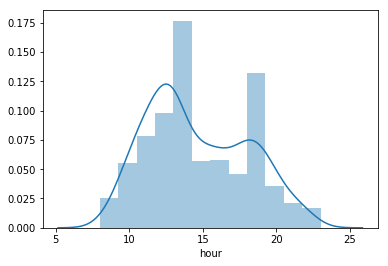

In [9]:
sb.distplot(df['hour'])

['card number' 'receipt date' 'store.pos' 'amount' 'number of items'
 'store' 'day_time' 'hour']


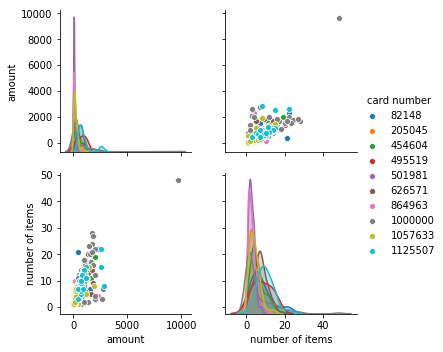

In [11]:
#pair_plot to see some relations 
columns=df.columns.values
print(columns) 
sb.pairplot(df,hue=columns[0],vars=columns[3:5] )

#### Below bar graph shows what amounts are spent per customer

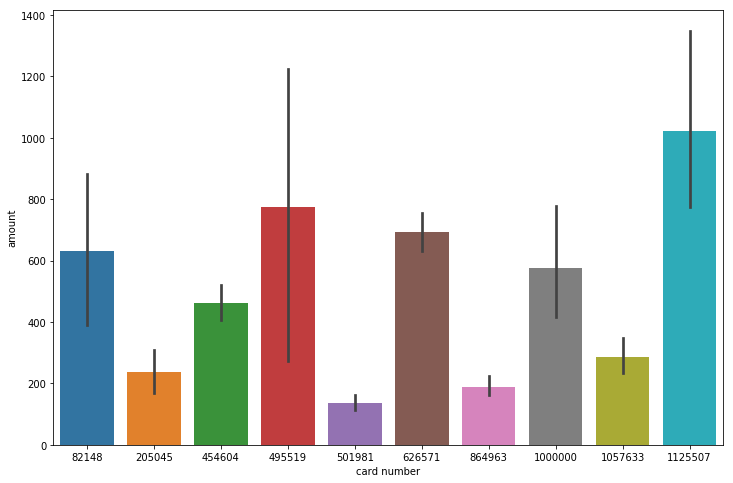

In [15]:
plt.figure(figsize=(12,8))   
sb.barplot(x='card number',y='amount',  data=df)

#### Lets see how the amounts are distributed among stores

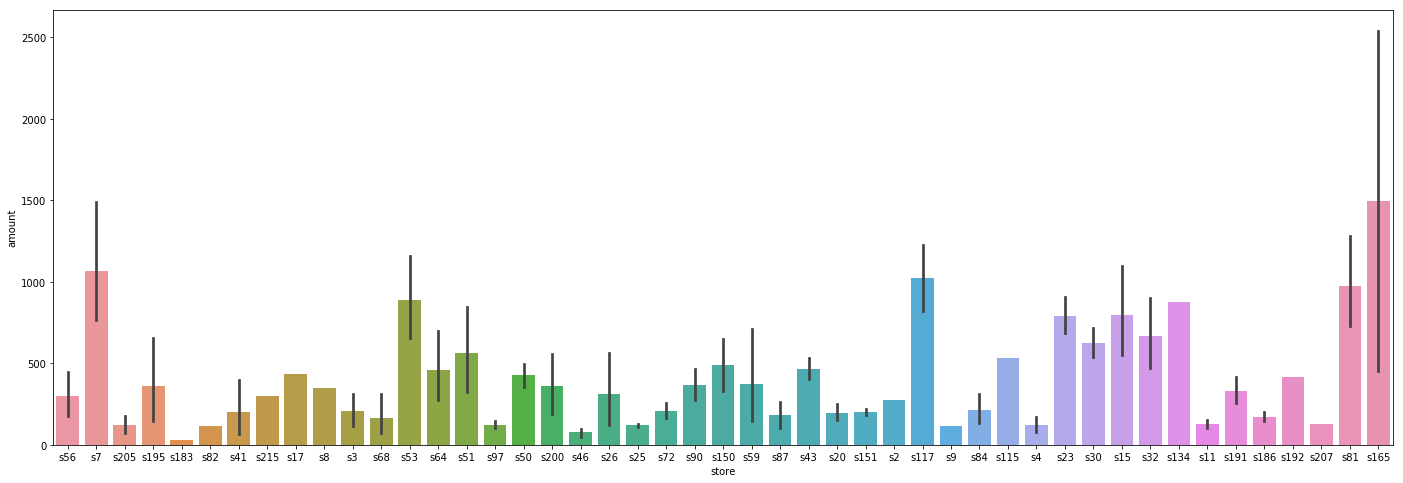

In [282]:
plt.figure(figsize=(24,8))  
sb.barplot(x='store',y='amount', data=df)

In [283]:
df['card number'].unique()

array([1000000,   82148,  205045,  454604,  495519,  501981,  626571,
        864963, 1057633, 1125507])

#### As we are going to predict store based on features it is simply a classification task. We will use some classification algorithms (logistic regression, svm etc.) to create our models. Firstly, we will separate 20% of our data for testing and train model with the rest. Also we will normalize our features as preprocessing

## Preprocessing and ML models

### Prediction of store for the first customer

In [284]:
first_customer=df['card number'].unique()[0]
print(first_customer)
first_df=df[df['card number']==first_customer]
first_df.tail()

1000000


,card number,receipt date,store.pos,amount,number of items,store,day_time,hour
116,1000000,2018-05-04 10:59:58,56.020,46.43,1,s56,1,10
117,1000000,2018-05-04 15:05:25,56.020,91.31,2,s56,1,15
118,1000000,2018-05-09 17:27:21,53.007,2000.00,4,s53,1,17
119,1000000,2018-05-10 10:41:08,56.016,87.65,2,s56,1,10
120,1000000,2018-05-11 14:05:33,56.020,75.83,2,s56,1,14


In [285]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [286]:
X = first_df[['amount', 'number of items', 'hour',  'day_time']]
y = first_df['store']

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_sc = Scaler.fit_transform(X_train)
X_test_sc = Scaler.fit_transform(X_test)

In [288]:
#Applying Logistic Regression for classifing
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr.predict(X_test_sc)
lr.score(X_test_sc, y_test)

0.76

In [289]:
#Applying SVM for classifing
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train_sc, y_train)
svc.predict(X_test_sc)
svc.score(X_test_sc, y_test)

0.76

In [290]:
##Applying perceptron for classifing
from sklearn.linear_model import Perceptron
prc = Perceptron()
prc.fit(X_train_sc, y_train) 
prc.predict(X_test_sc)
prc.score(X_test_sc, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.72

#### As we saw our svm and logistic regression models were able to predict rightly with 76% score. It means that 3 out of 4 predictions are correct. I think these predictions are quiet good for a small data.

#### Because there are not enough data regarding some costomers I will train the models on the whole data 

### Prediction of store for each customer

In [291]:
# Converting categorical variable to dummy varaible
df_dummy = pd.get_dummies(df,columns=['card number'], drop_first=True)
df_dummy.head(3)

,receipt date,store.pos,amount,number of items,store,day_time,hour,card number_205045,card number_454604,card number_495519,card number_501981,card number_626571,card number_864963,card number_1000000,card number_1057633,card number_1125507
0,2017-11-14 11:33:51,56.02,43.18,2,s56,1,11,0,0,0,0,0,0,1,0,0
1,2017-11-16 14:11:27,56.02,234.39,3,s56,1,14,0,0,0,0,0,0,1,0,0
2,2017-11-17 13:21:41,56.02,24.32,1,s56,1,13,0,0,0,0,0,0,1,0,0


In [292]:
X_ = df_dummy[['amount', 'number of items','day_time', 'hour', 'card number_205045', 'card number_454604',
       'card number_495519', 'card number_501981', 'card number_626571',
       'card number_864963', 'card number_1000000', 'card number_1057633',
       'card number_1125507']]

In [293]:
y_ = df_dummy['store']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.20, random_state=42)
X_train_sc = Scaler.fit_transform(X_train)
X_test_sc = Scaler.fit_transform(X_test)

In [295]:
# Applying logistic regression
lr.fit(X_train_sc, y_train)
lr.predict(X_test_sc)
lr.score(X_test_sc, y_test)

0.7037037037037037

In [296]:
#Applying support vector machine 
svc.fit(X_train_sc, y_train)
svc.predict(X_test_sc)
svc.score(X_test_sc, y_test)

0.7222222222222222

In [297]:
#Applying Gradient boosting 
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sc, y_train)
gbc.predict(X_test_sc)
gbc.score(X_test_sc, y_test)

0.6111111111111112